In [ ]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="urubu100",
  password="urubu100",
  database="cortisol"
)
cursor = mydb.cursor()
print(mydb)

In [ ]:
import azure.iot.device as iotDevice

hub = iotDevice.IoTHubDeviceClient.create_from_connection_string('HostName=guilherme02221070.azure-devices.net;DeviceId=guilherme02221070;SharedAccessKey=vH+aXm72QJP8vfYq7zBNs1OWwfUDLR31aAIoTEhMhPI=')
hub.connect()

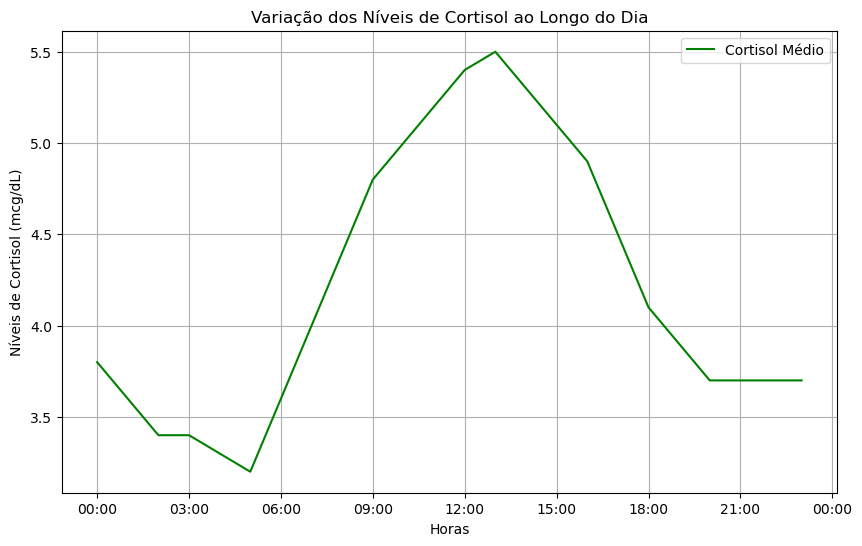

In [16]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import random
from random import randrange
import json
import sys

def gerarDados(qtdPessoas):
    for pessoa in range(qtdPessoas):
        horas = list(range(24))
        cortisol_medio = []
        cortisol = randrange(3, 6+1)
        messageId = 0
        for hora in horas:
            if hora < 6 or hora > 18:  # Noite
                if(hora >= 19 and hora < 21):
                    cortisol -= 0.2
                elif(hora >= 21 and hora < 0):
                    cortisol -= 0.4
                elif(hora >= 0 and hora < 3):
                    cortisol -= 0.2
                elif(hora >= 4 and hora < 6):
                    cortisol -= 0.1
            else:  # Dia
                if(hora >= 6 and hora <= 9):
                    cortisol += 0.4
                elif(hora >= 10 and hora <= 12):
                    cortisol += 0.2
                elif(hora == 13):
                    cortisol += 0.1
                elif(hora >= 14 and hora <= 16):
                    cortisol -= 0.2
                elif(hora >= 17 and hora <= 18):
                    cortisol -= 0.4
            cortisol_medio.append(cortisol)

            data_hora = datetime(2024, 1, 1, hora, 0)  

            # sql = "INSERT INTO dados_cortisol (dado_cortisol, data_horario, id_pessoa) VALUES (%s, %s, %s)"
            # valores = (cortisol, data_hora, pessoa)

            # cursor.execute(sql, valores)

        # message = {
        #     'messageId': messageId,
        #     'rangeTime': horas,
        #     'cortisolList': cortisol_medio
        # }

        # jsonMessage = json.dumps(message)

        # print(f'Mensagen: {jsonMessage}')
        # print(f'Bytes Mensagem: {sys.getsizeof(jsonMessage)}')

        # try:
        #     hub.send_message(jsonMessage)
        # except Exception as e:
        #     print(f'Erro ao enviar mensagem: {e}')

        messageId + 1

        # mydb.commit()

        # cursor.close()
        # mydb.close()


        # Convertendo as horas para o formato de data/hora
        horas_formatadas = [datetime(2024, 1, 1, hora, 0) for hora in horas]

        plt.figure(figsize=(10, 6))
        plt.plot(horas_formatadas, cortisol_medio, label='Cortisol Médio', color='green')

        # Formatando o eixo x como horas
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

        plt.xlabel('Horas')
        plt.ylabel('Níveis de Cortisol (mcg/dL)')
        plt.title('Variação dos Níveis de Cortisol ao Longo do Dia')

        plt.legend()
        plt.grid(True)

        plt.show()

gerarDados(1)


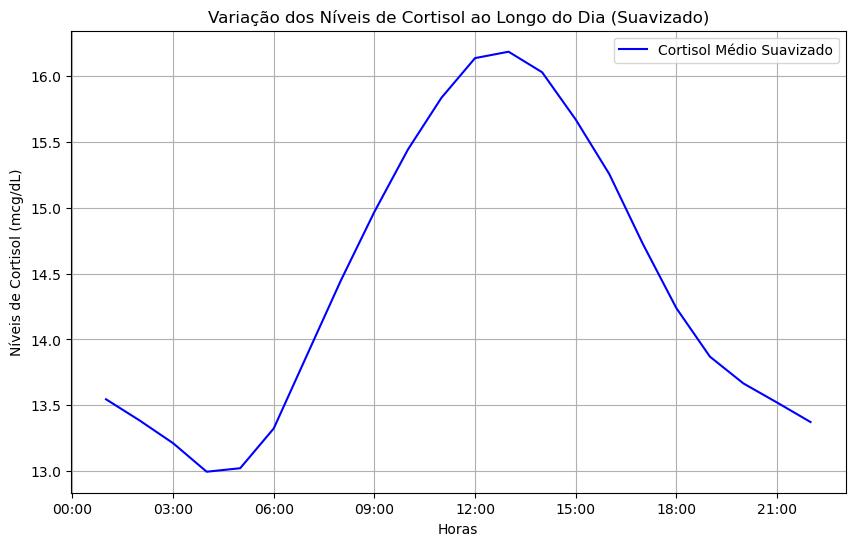

In [17]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import random
from random import randrange
import numpy as np
import json
import sys

def gerarDados(qtdPessoas):
    for pessoa in range(qtdPessoas):
        horas = list(range(24))
        cortisol_medio = []
        cortisol = randrange(10, 15+1)  # Inicialização com valor maior para permitir variação até 23
        messageId = 0
        for hora in horas:
            if hora < 6 or hora > 18:  # Noite
                cortisol -= random.uniform(0.1, 0.3)
            else:  # Dia
                if hora >= 6 and hora <= 9:
                    cortisol += random.uniform(0.5, 0.7)
                elif hora >= 10 and hora <= 12:
                    cortisol += random.uniform(0.3, 0.5)
                elif hora == 13:
                    cortisol += random.uniform(0.1, 0.2)
                elif hora >= 14 and hora <= 16:
                    cortisol -= random.uniform(0.3, 0.5)
                elif hora >= 17 and hora <= 18:
                    cortisol -= random.uniform(0.5, 0.7)
            cortisol_medio.append(cortisol)

            data_hora = datetime(2024, 1, 1, hora, 0)  

        # Aplicando a média móvel para suavizar a curva
        window_size = 3  # Tamanho da janela da média móvel
        weights = np.repeat(1.0, window_size) / window_size
        cortisol_suavizado = np.convolve(cortisol_medio, weights, 'valid')

        horas_formatadas = [datetime(2024, 1, 1, hora, 0) for hora in range(1, 24 - window_size + 2)]

        plt.figure(figsize=(10, 6))
        plt.plot(horas_formatadas, cortisol_suavizado, label='Cortisol Médio Suavizado', color='blue')
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
        plt.xlabel('Horas')
        plt.ylabel('Níveis de Cortisol (mcg/dL)')
        plt.title('Variação dos Níveis de Cortisol ao Longo do Dia (Suavizado)')
        plt.legend()
        plt.grid(True)
        plt.show()

gerarDados(1)
